# 1. Extract Data

In [61]:
import os
print(os.listdir(path="..\\"))

['.gitkeep', 'ANN', 'Employee_attrition.csv', 'Housing.csv', 'Income&Expenditure.csv']


In [62]:
import pandas as pd
data=pd.read_csv("..\\Housing.csv").iloc[:,1:]
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2. EDA

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [64]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

# 3. Feature Extraction

In [65]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
col=data.columns
data=mm.fit_transform(data)
data=pd.DataFrame(data,columns=col)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713


[]

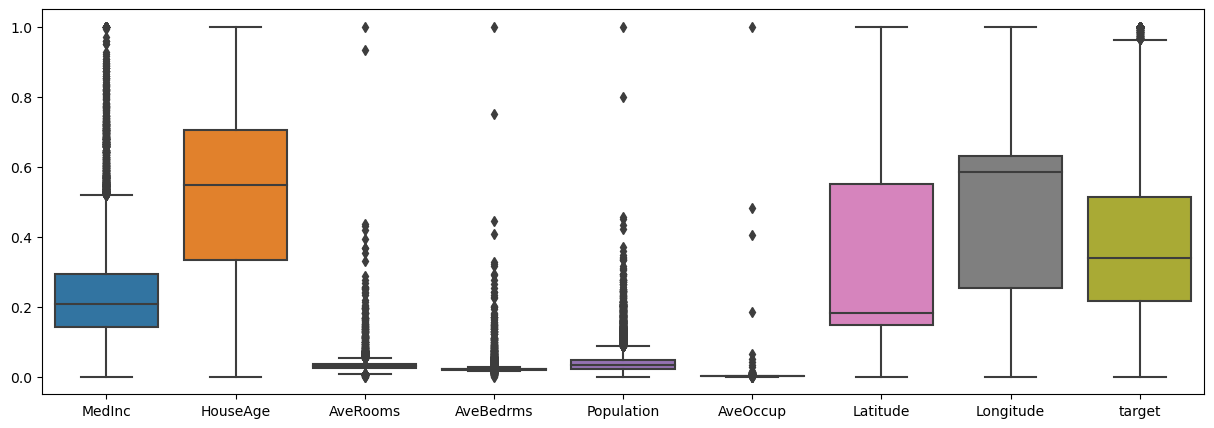

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.plot()

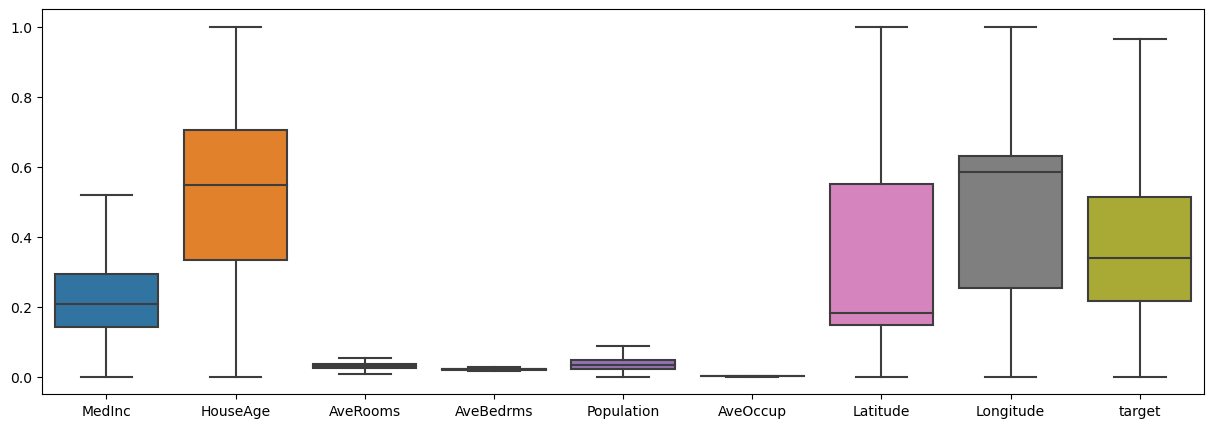

In [67]:
def f(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    ll=q1-(IQR*1.5)
    ul=q3+(IQR*1.5)

    data.loc[data[i]<ll,i]=ll
    data.loc[data[i]>ul,i]=ul
for i in col:
    f(i)

plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.show()

In [68]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.518139,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.518139,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.026868,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [69]:
y

0        0.902266
1        0.708247
2        0.695051
3        0.672783
4        0.674638
           ...   
20635    0.130105
20636    0.128043
20637    0.159383
20638    0.143713
20639    0.153403
Name: target, Length: 20640, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

y_train=sc.fit_transform(y_train.values.reshape(-1,1))
y_test=sc.transform(y_test.values.reshape(-1,1))

# 4. ANN Layers

In [72]:
from tensorflow import keras
model=keras.Sequential()

In [73]:
model.add(keras.layers.Dense(units=30,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="relu"))
model.add(keras.layers.Dense(units=5,activation="relu"))
model.add(keras.layers.Dense(units=1,activation="linear"))

In [74]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [75]:
model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.7106 - mse: 0.7106 - val_loss: 0.3027 - val_mse: 0.3027
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2872 - mse: 0.2872 - val_loss: 0.2785 - val_mse: 0.2785
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2553 - mse: 0.2553 - val_loss: 0.2714 - val_mse: 0.2714
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2572 - mse: 0.2572 - val_loss: 0.2620 - val_mse: 0.2620
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2586 - mse: 0.2586 - val_loss: 0.2601 - val_mse: 0.2601
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2465 - mse: 0.2465 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2555 - val_mse: 0.2555
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2387 - mse: 0.2387 - val_loss: 0.2557 - val_mse: 0.2557
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 

# 5. Model Evaluation

In [76]:
y_pred=model.predict(x_test)
y_pred


194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[ 0.6864043 ],
       [-0.86182475],
       [ 1.3801371 ],
       ...,
       [-0.8563939 ],
       [ 0.09894592],
       [-0.06343963]], dtype=float32)

# 6. Result visualization

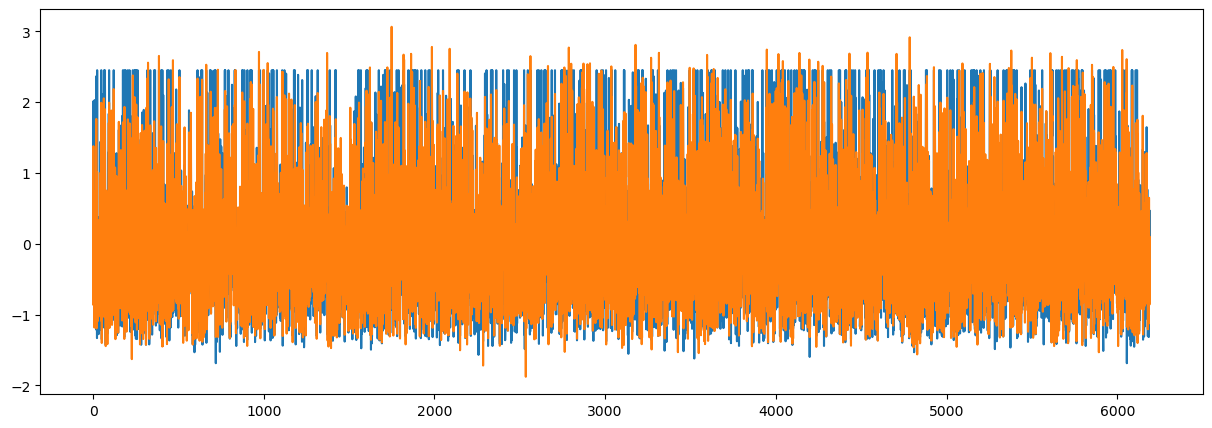

In [77]:
plt.figure(figsize=[15,5])
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

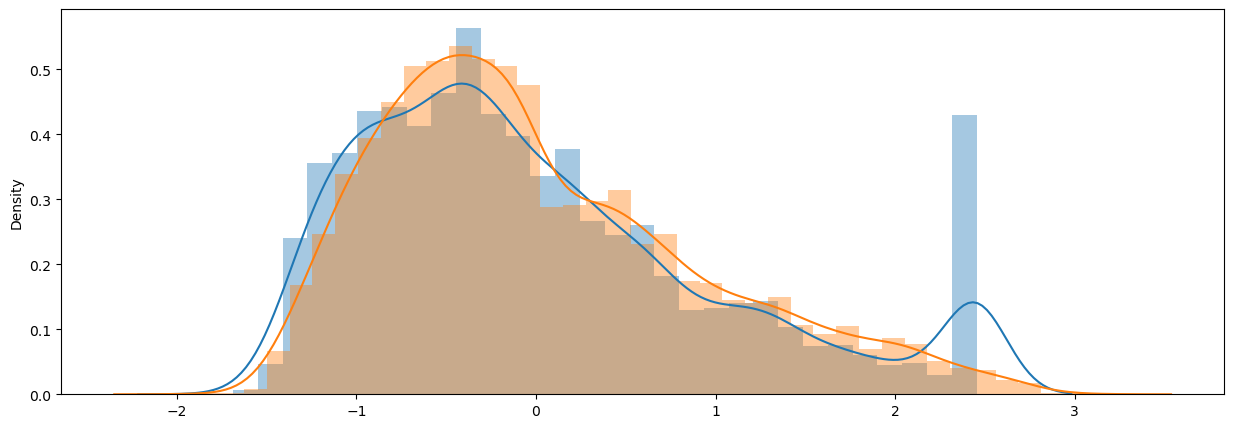

In [78]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,5])
sns.distplot(y_test)
sns.distplot(y_pred)
plt.show()